In [1]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 51kB/s 


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize']=22,10
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
!gdown --id 1gBpTS_MsWfHSFeCtORv0RxlShgBIKnYx --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1gBpTS_MsWfHSFeCtORv0RxlShgBIKnYx
To: /content/london_bike_sharing.csv
100% 1.03M/1.03M [00:00<00:00, 65.8MB/s]


In [4]:
df=pd.read_csv('london_bike_sharing.csv', parse_dates=['timestamp'], index_col='timestamp')

In [5]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [7]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [8]:
#Some feature engineering
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['month'] = df.index.month

In [27]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


In [47]:
df.iloc[4995:5000, :]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-07-31 18:00:00,3275,20.5,20.5,44.5,12.0,2.0,0.0,0.0,1.0,18,4,31,7
2015-07-31 19:00:00,2260,20.0,20.0,46.0,14.0,1.0,0.0,0.0,1.0,19,4,31,7
2015-07-31 20:00:00,1597,19.0,19.0,49.0,13.0,1.0,0.0,0.0,1.0,20,4,31,7
2015-07-31 21:00:00,1188,18.0,18.0,49.0,11.0,1.0,0.0,0.0,1.0,21,4,31,7
2015-07-31 22:00:00,920,17.5,17.5,50.5,9.0,1.0,0.0,0.0,1.0,22,4,31,7


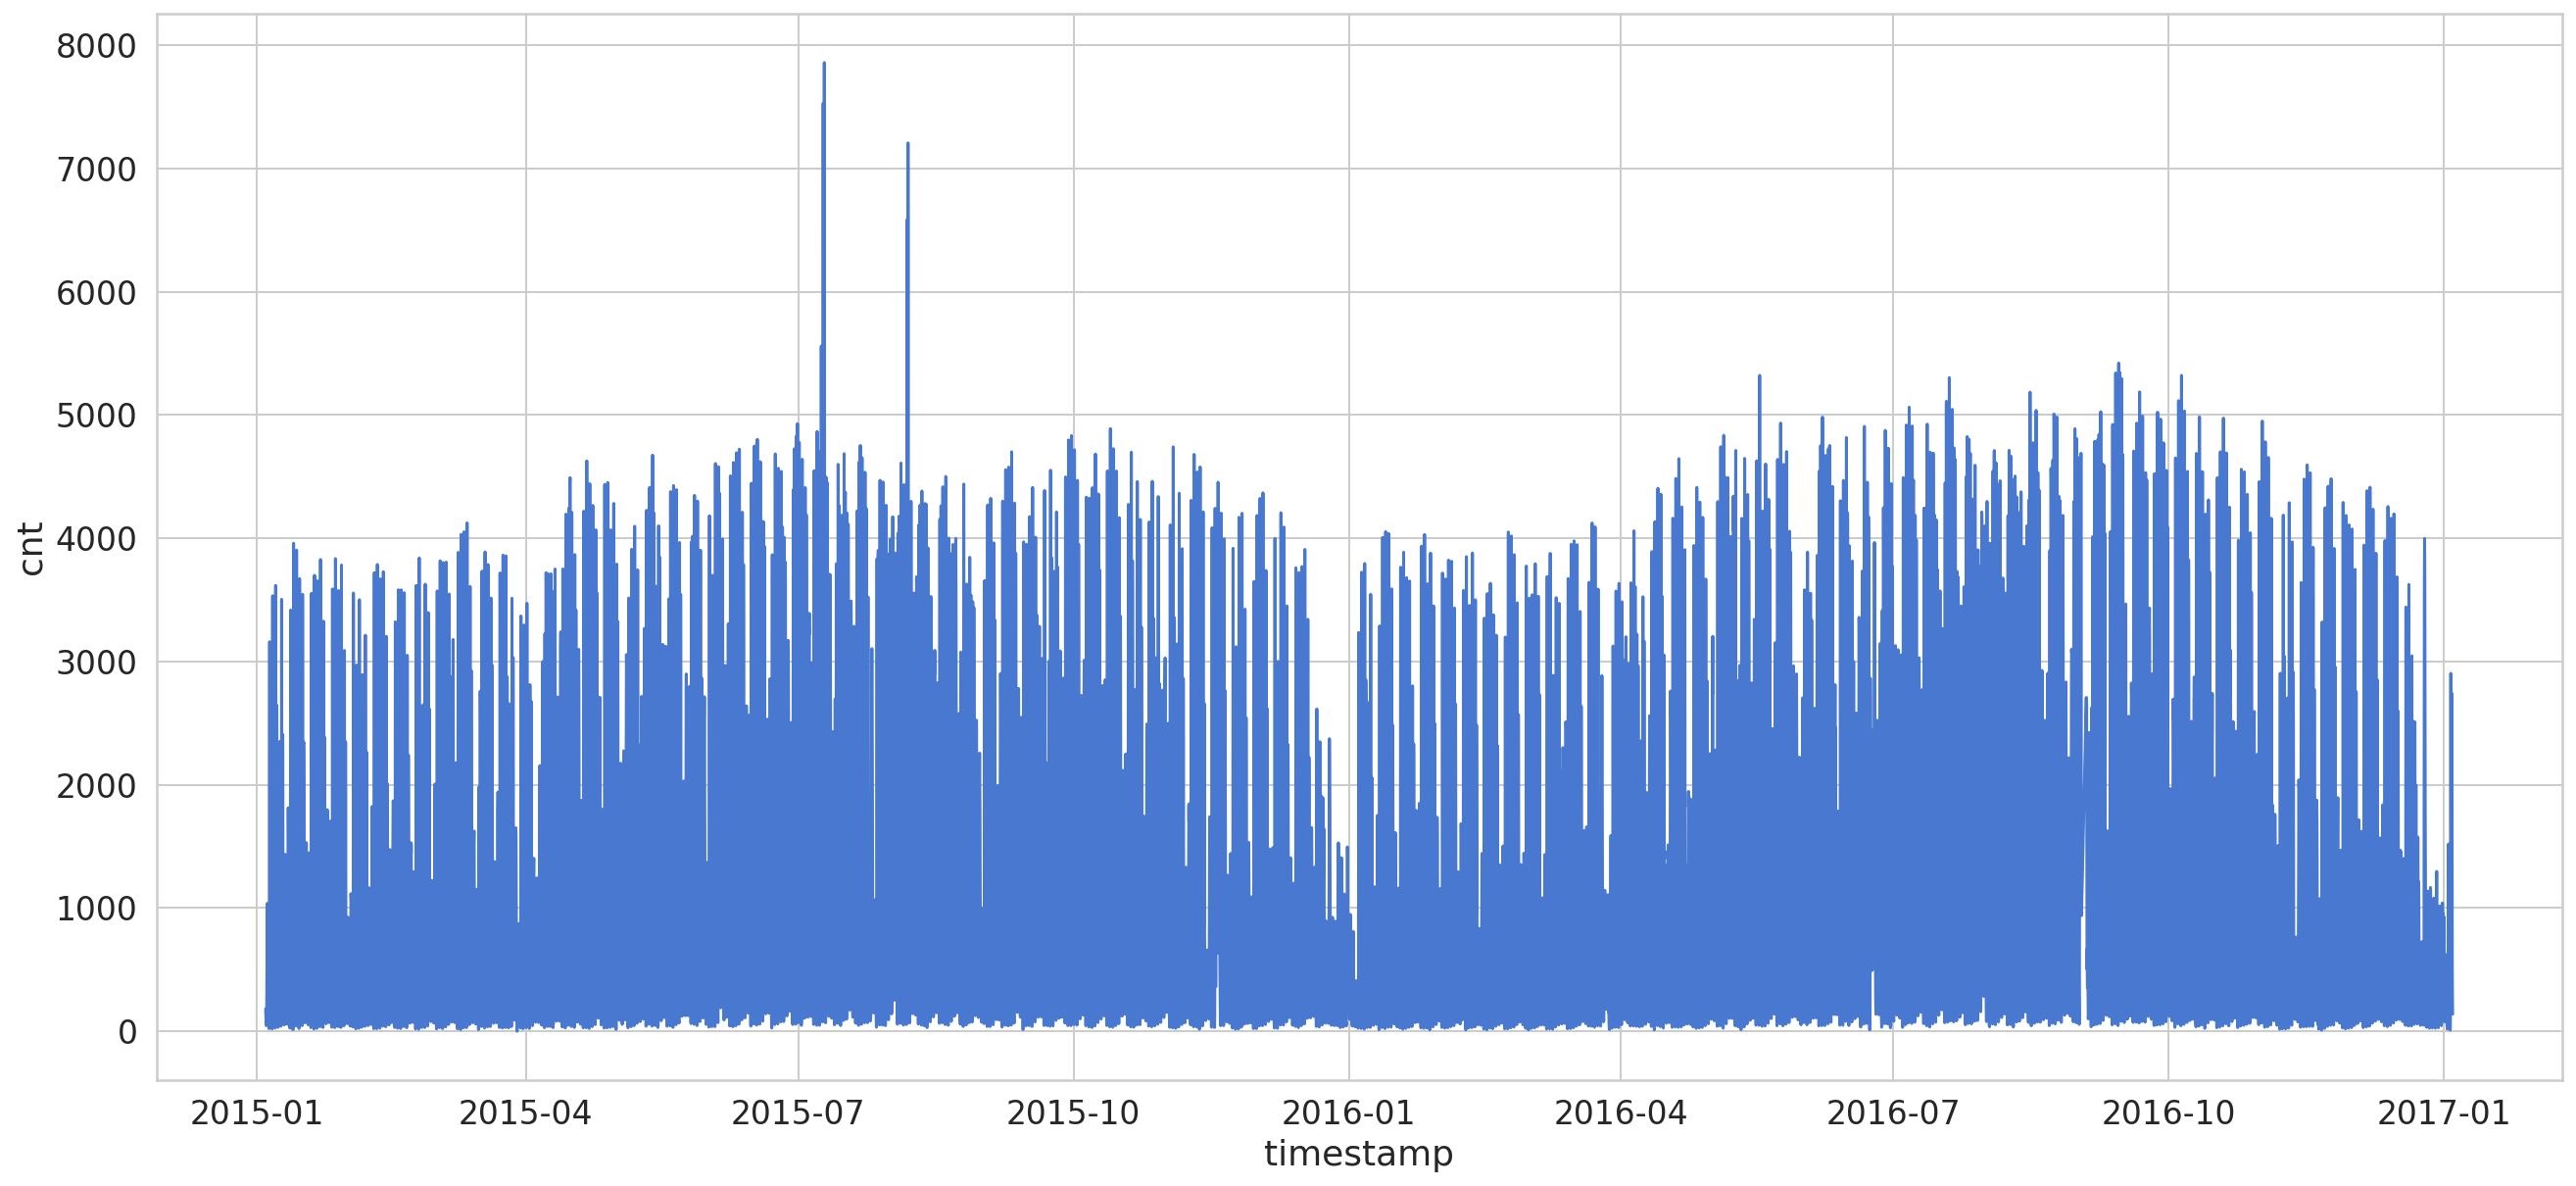

In [35]:
# Take a look at data
sns.lineplot(x=df.index, y='cnt', data=df);

In [58]:
dfx = df.iloc[4000:5000, :]

In [34]:
dfx

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-07-31 18:00:00,3275,20.5,20.5,44.5,12.0,2.0,0.0,0.0,1.0,18,4,31,7
2015-07-31 19:00:00,2260,20.0,20.0,46.0,14.0,1.0,0.0,0.0,1.0,19,4,31,7
2015-07-31 20:00:00,1597,19.0,19.0,49.0,13.0,1.0,0.0,0.0,1.0,20,4,31,7
2015-07-31 21:00:00,1188,18.0,18.0,49.0,11.0,1.0,0.0,0.0,1.0,21,4,31,7
2015-07-31 22:00:00,920,17.5,17.5,50.5,9.0,1.0,0.0,0.0,1.0,22,4,31,7


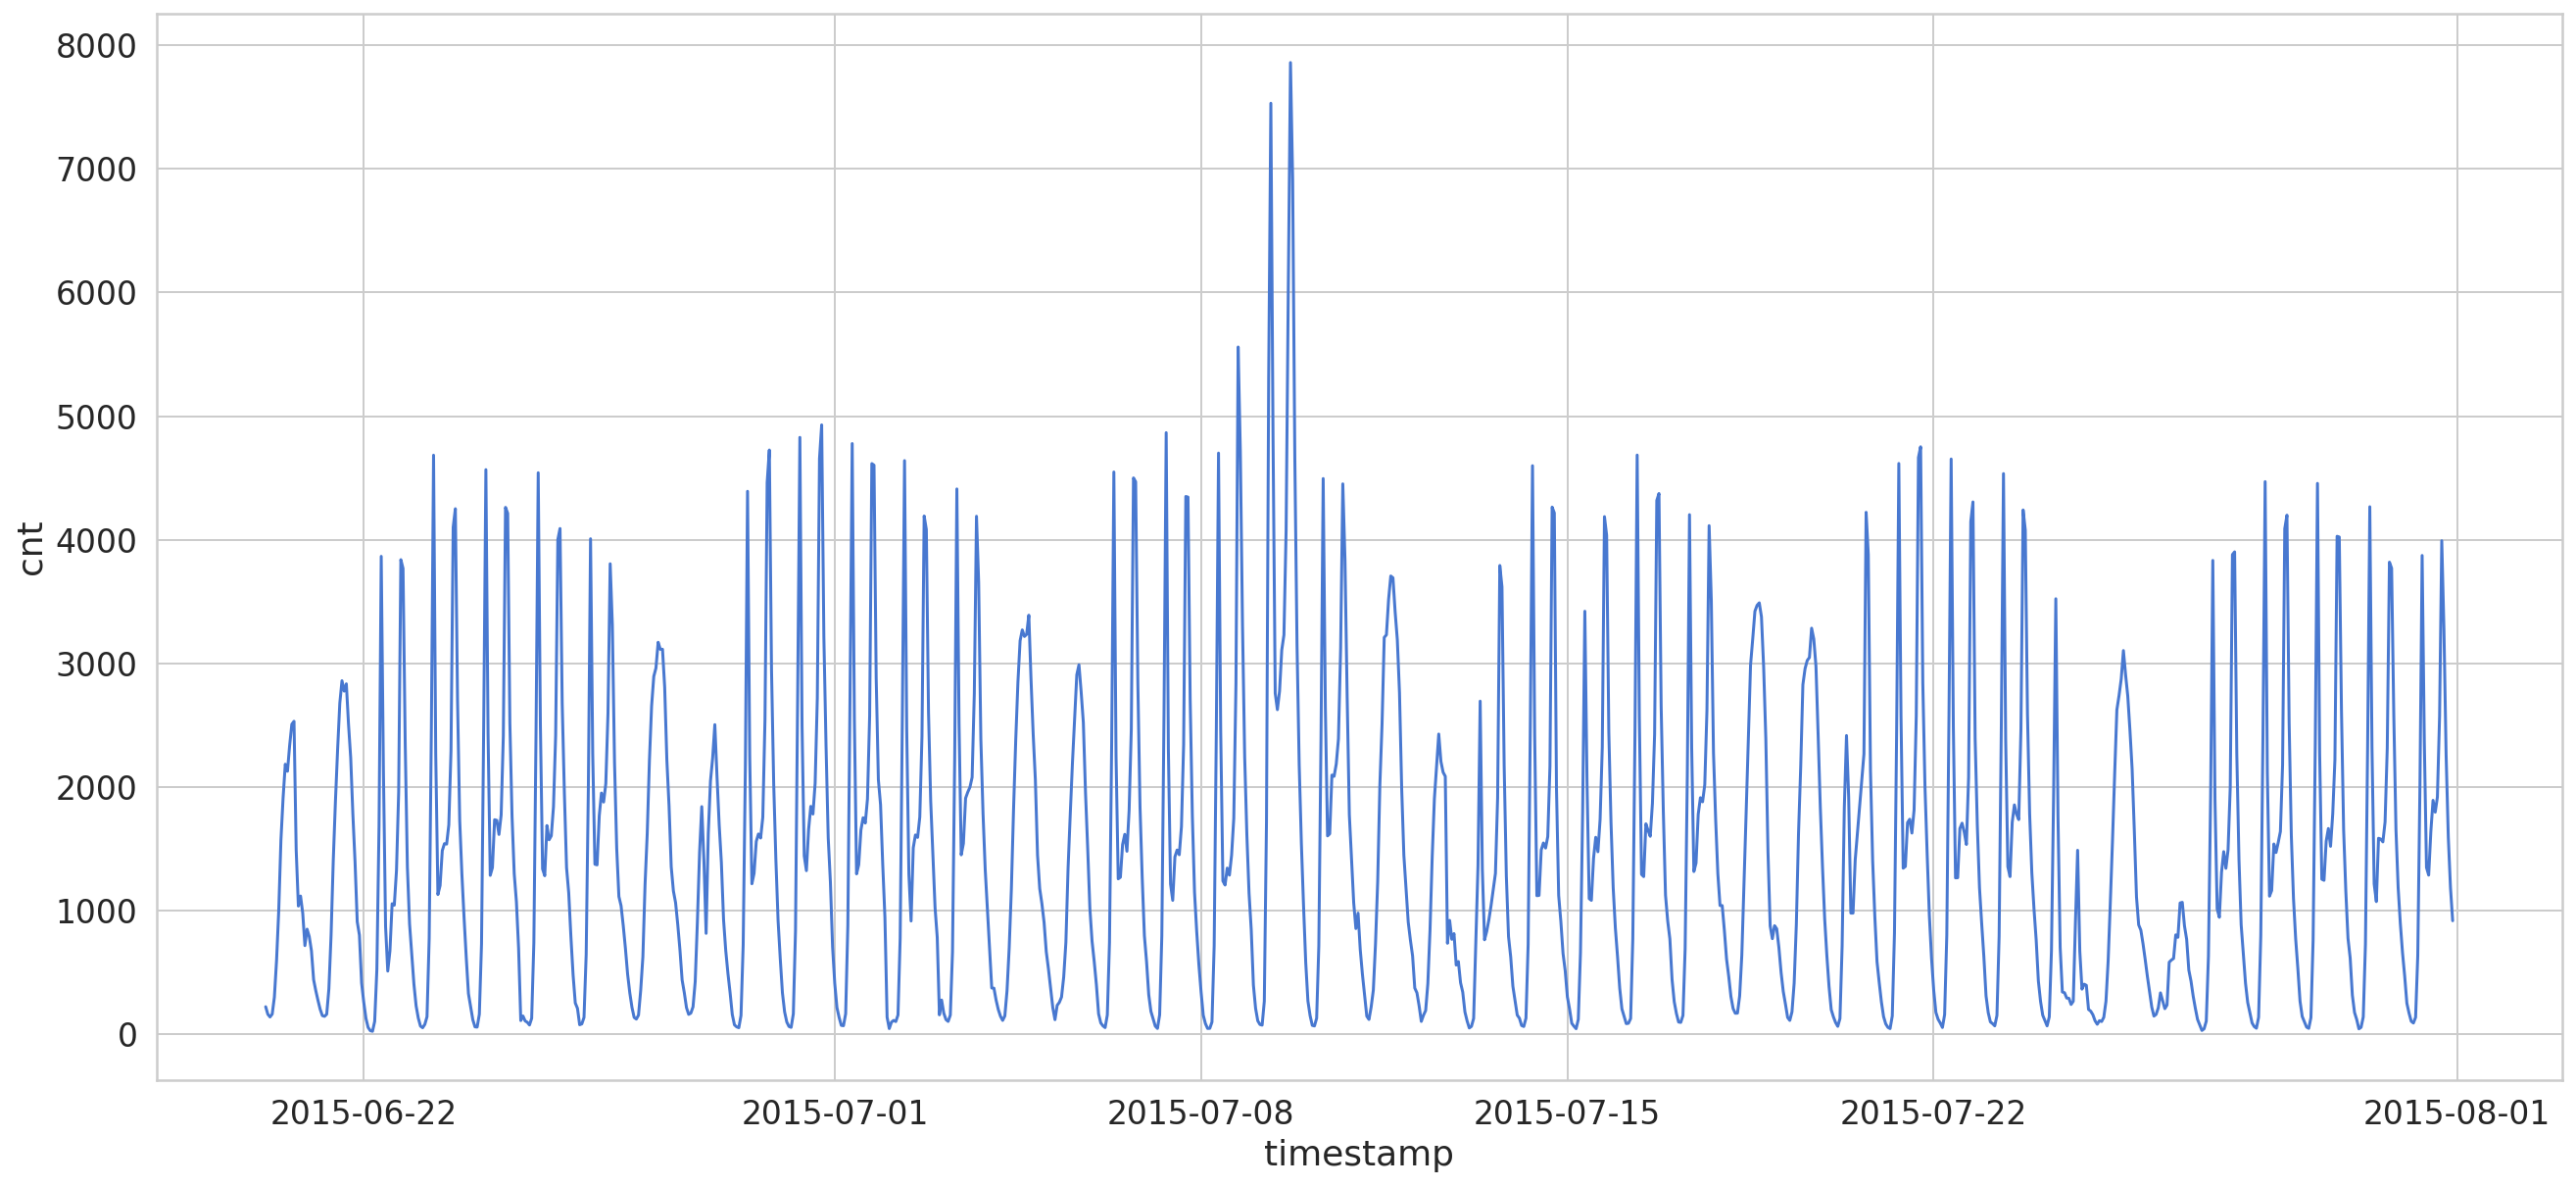

In [38]:
sns.lineplot(x=dfx.index, y='cnt', data=dfx);

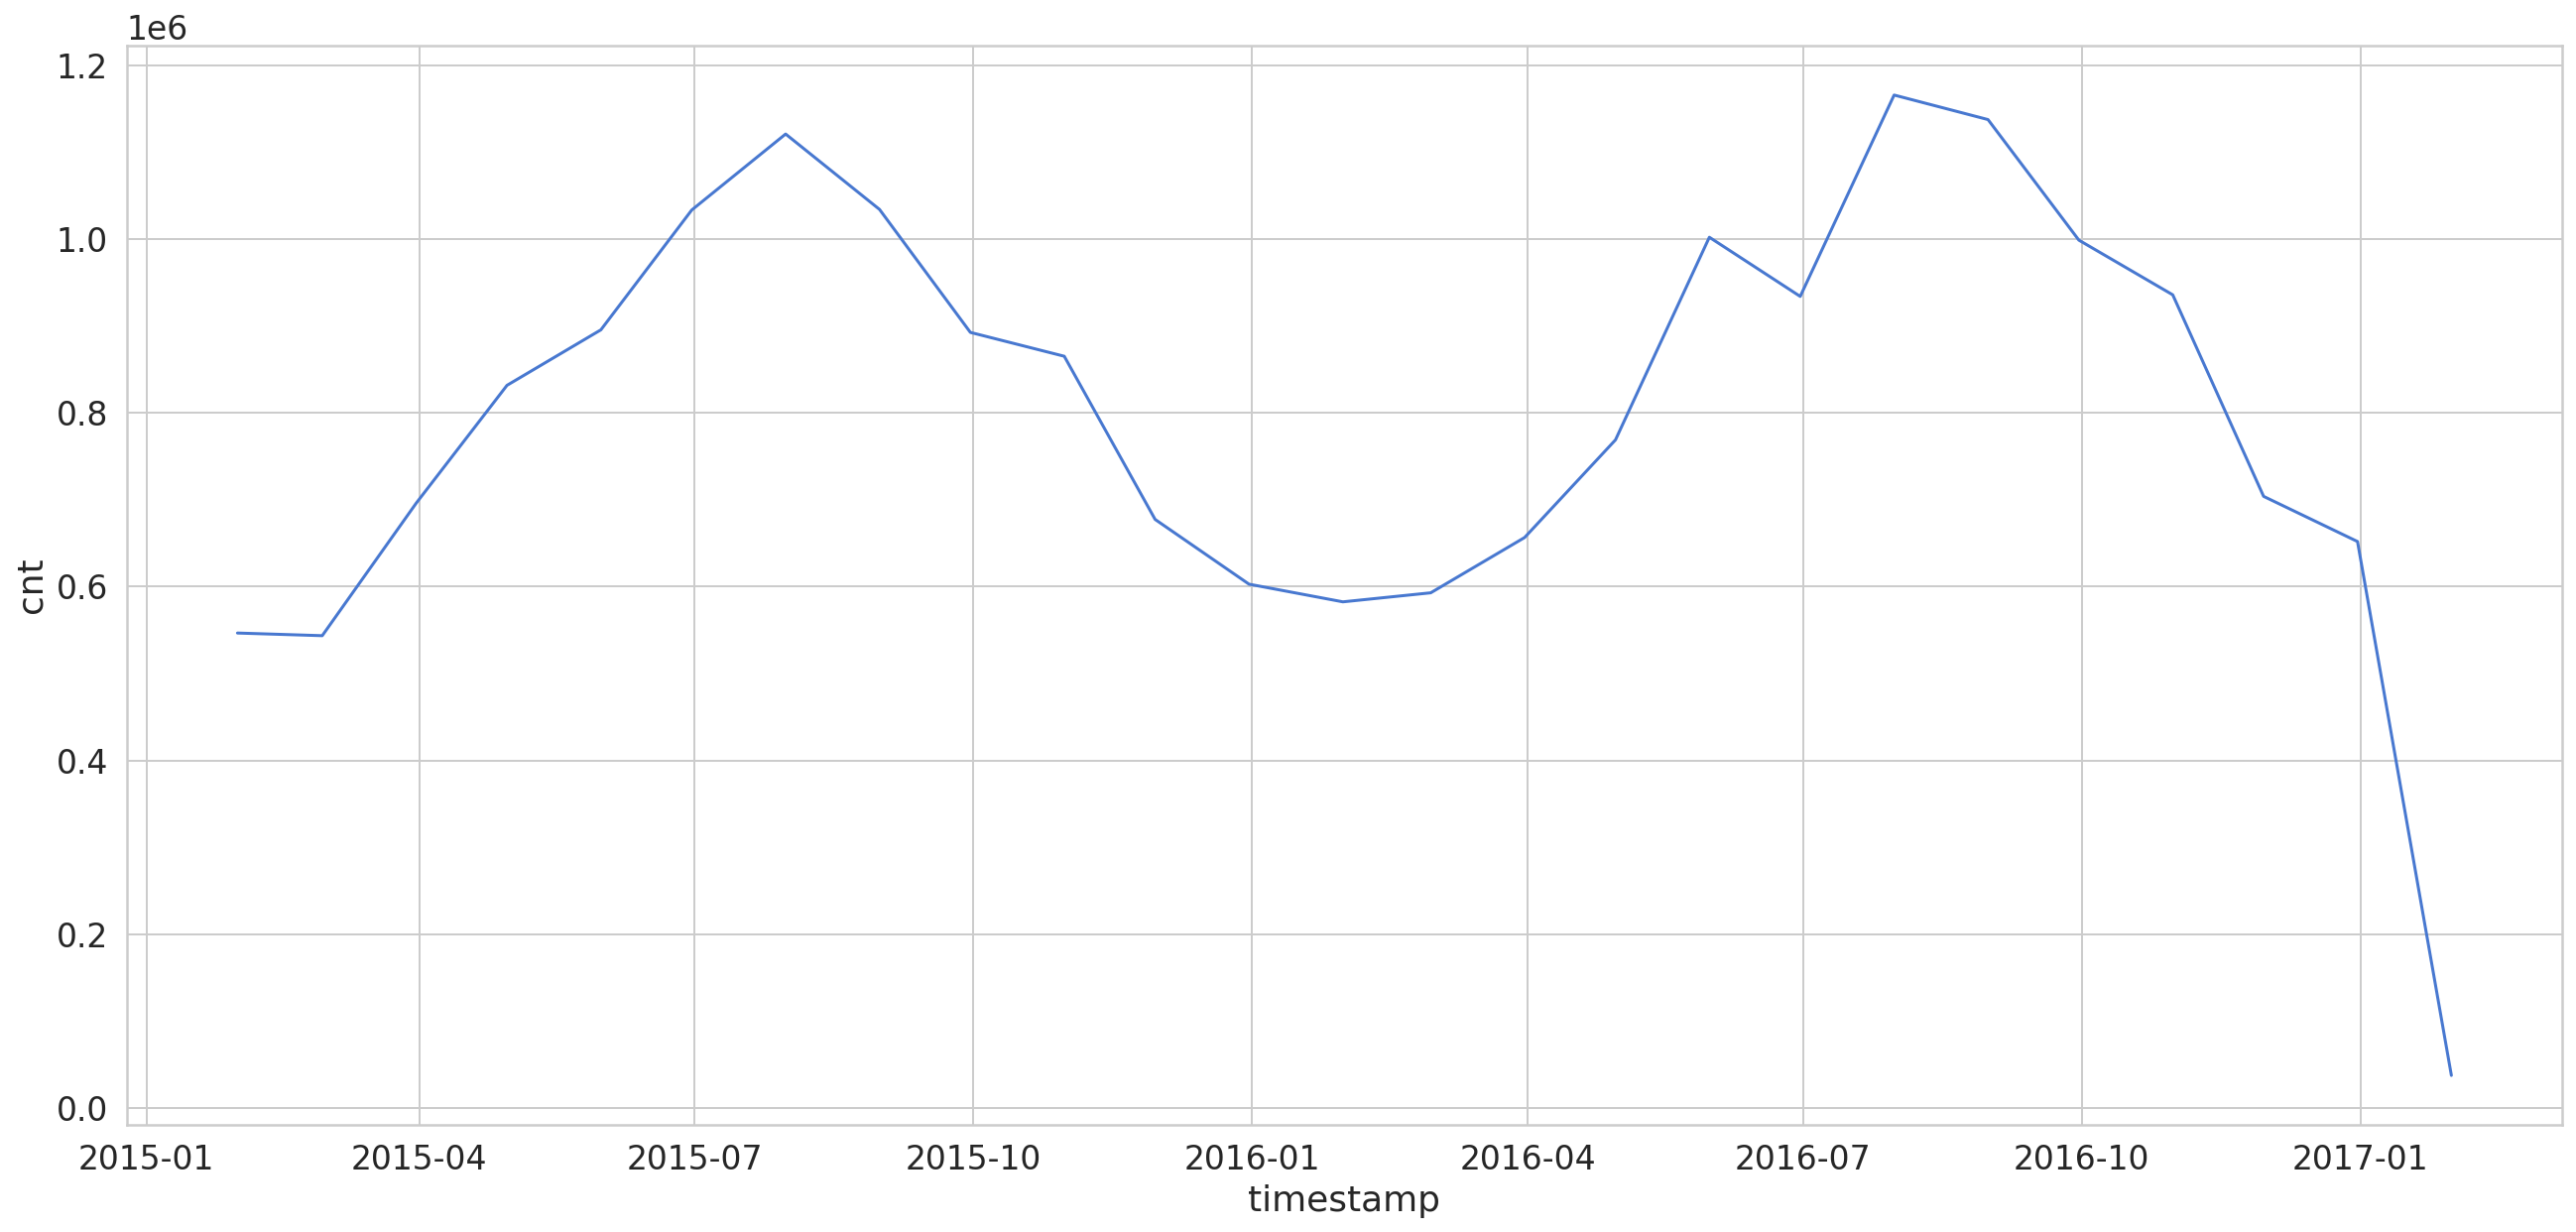

In [49]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y='cnt', data=df_by_month)

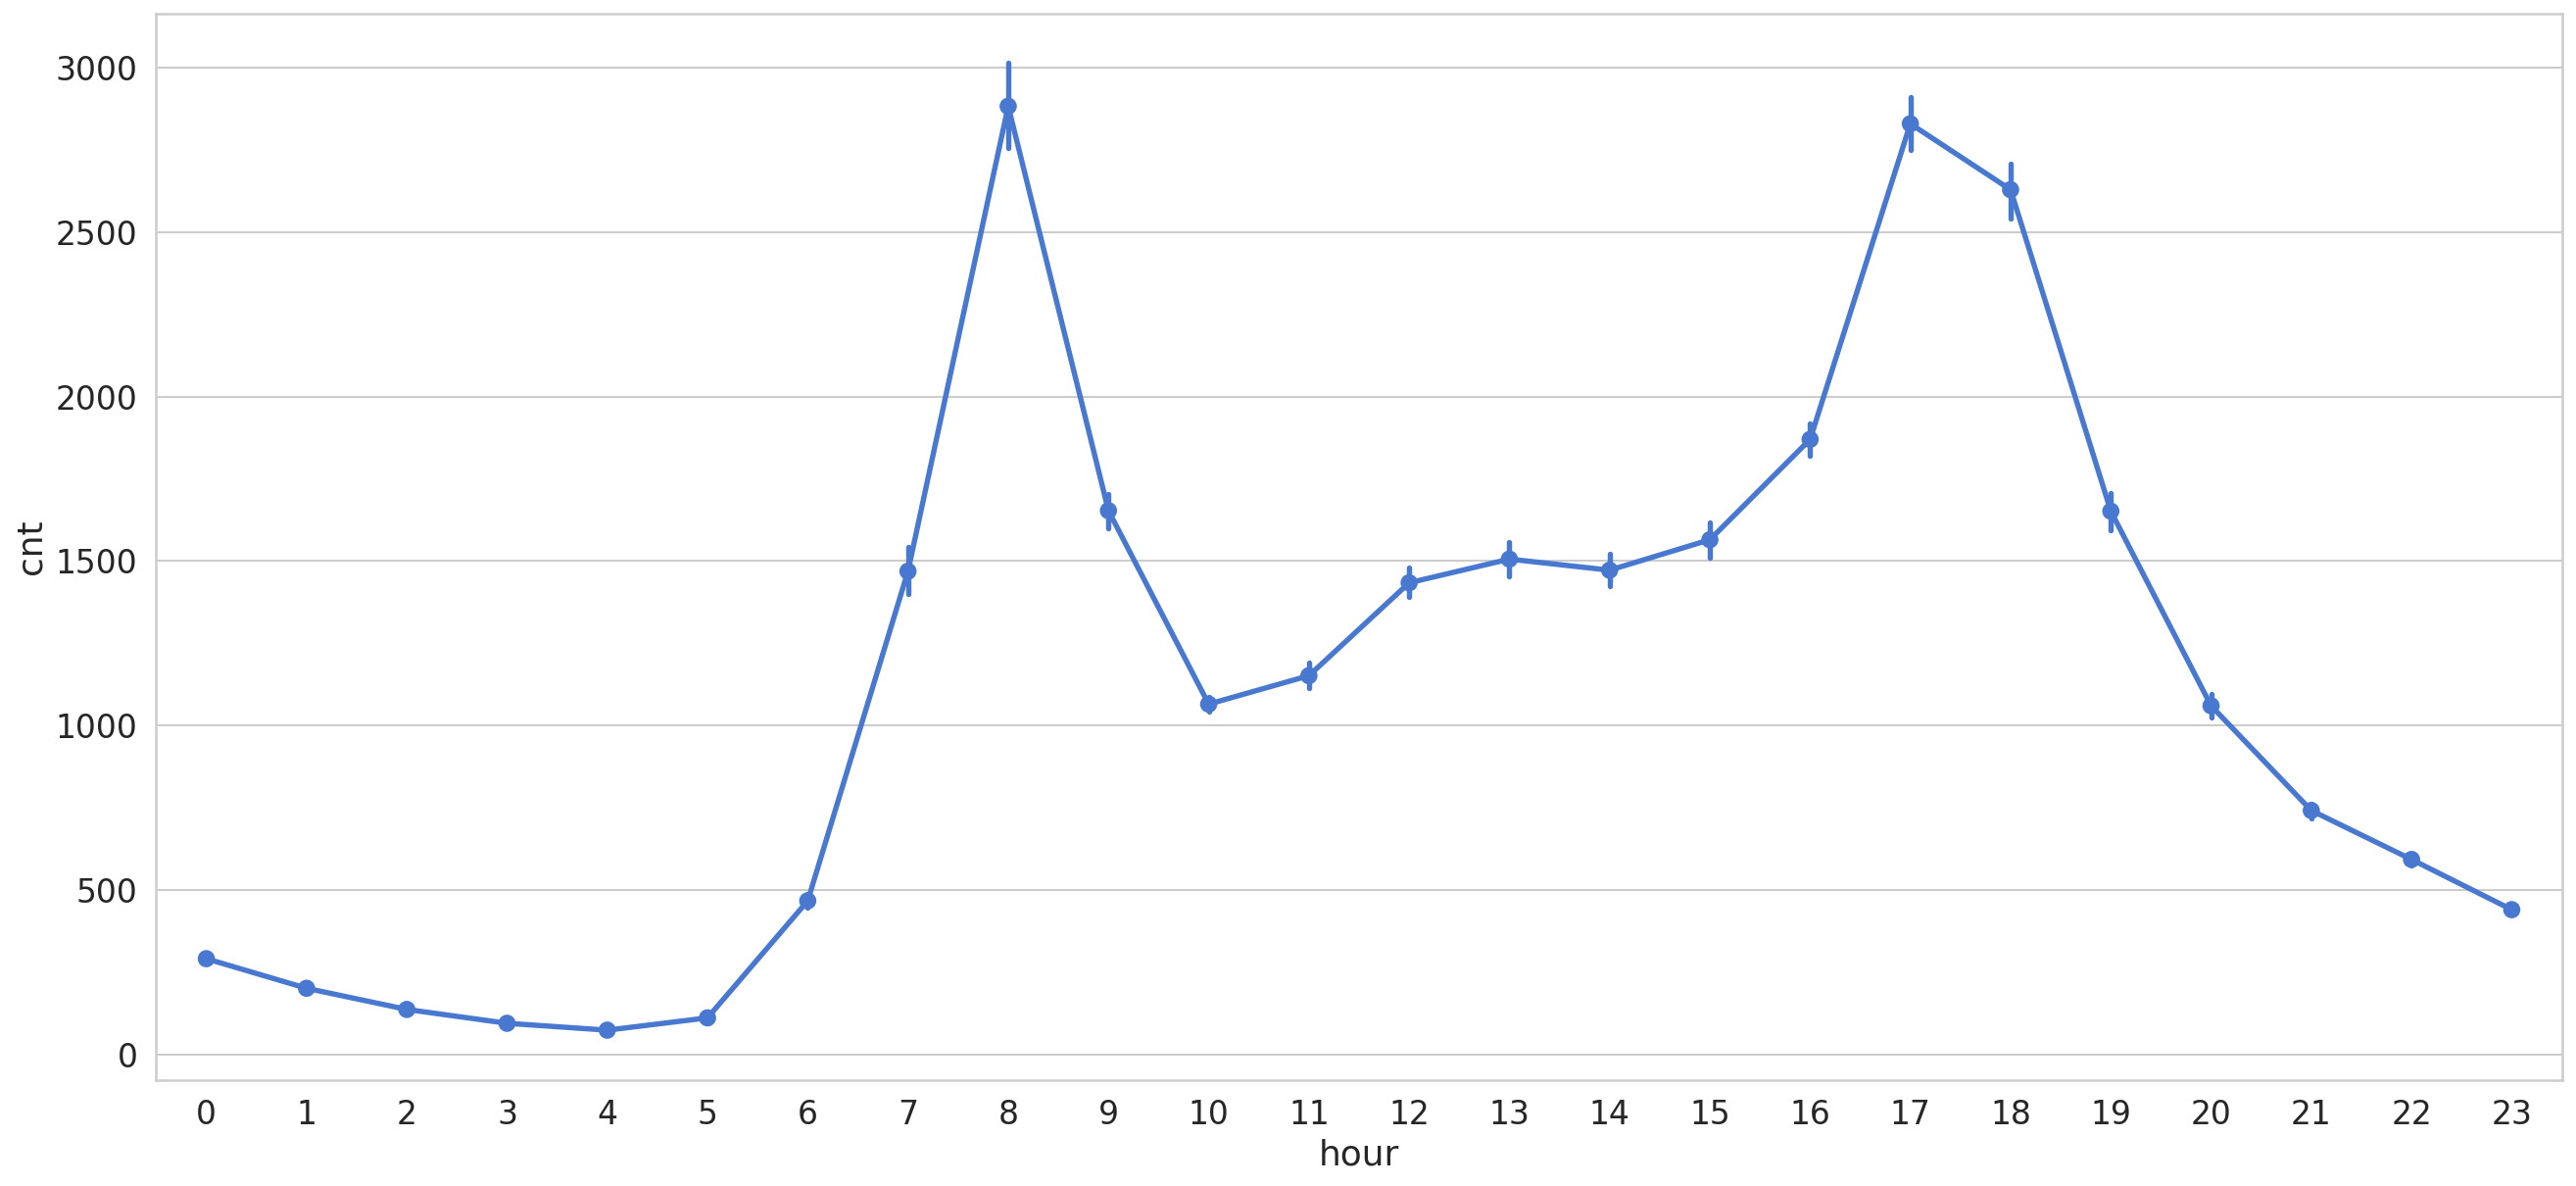

In [50]:
sns.pointplot(data=df, x='hour', y='cnt')

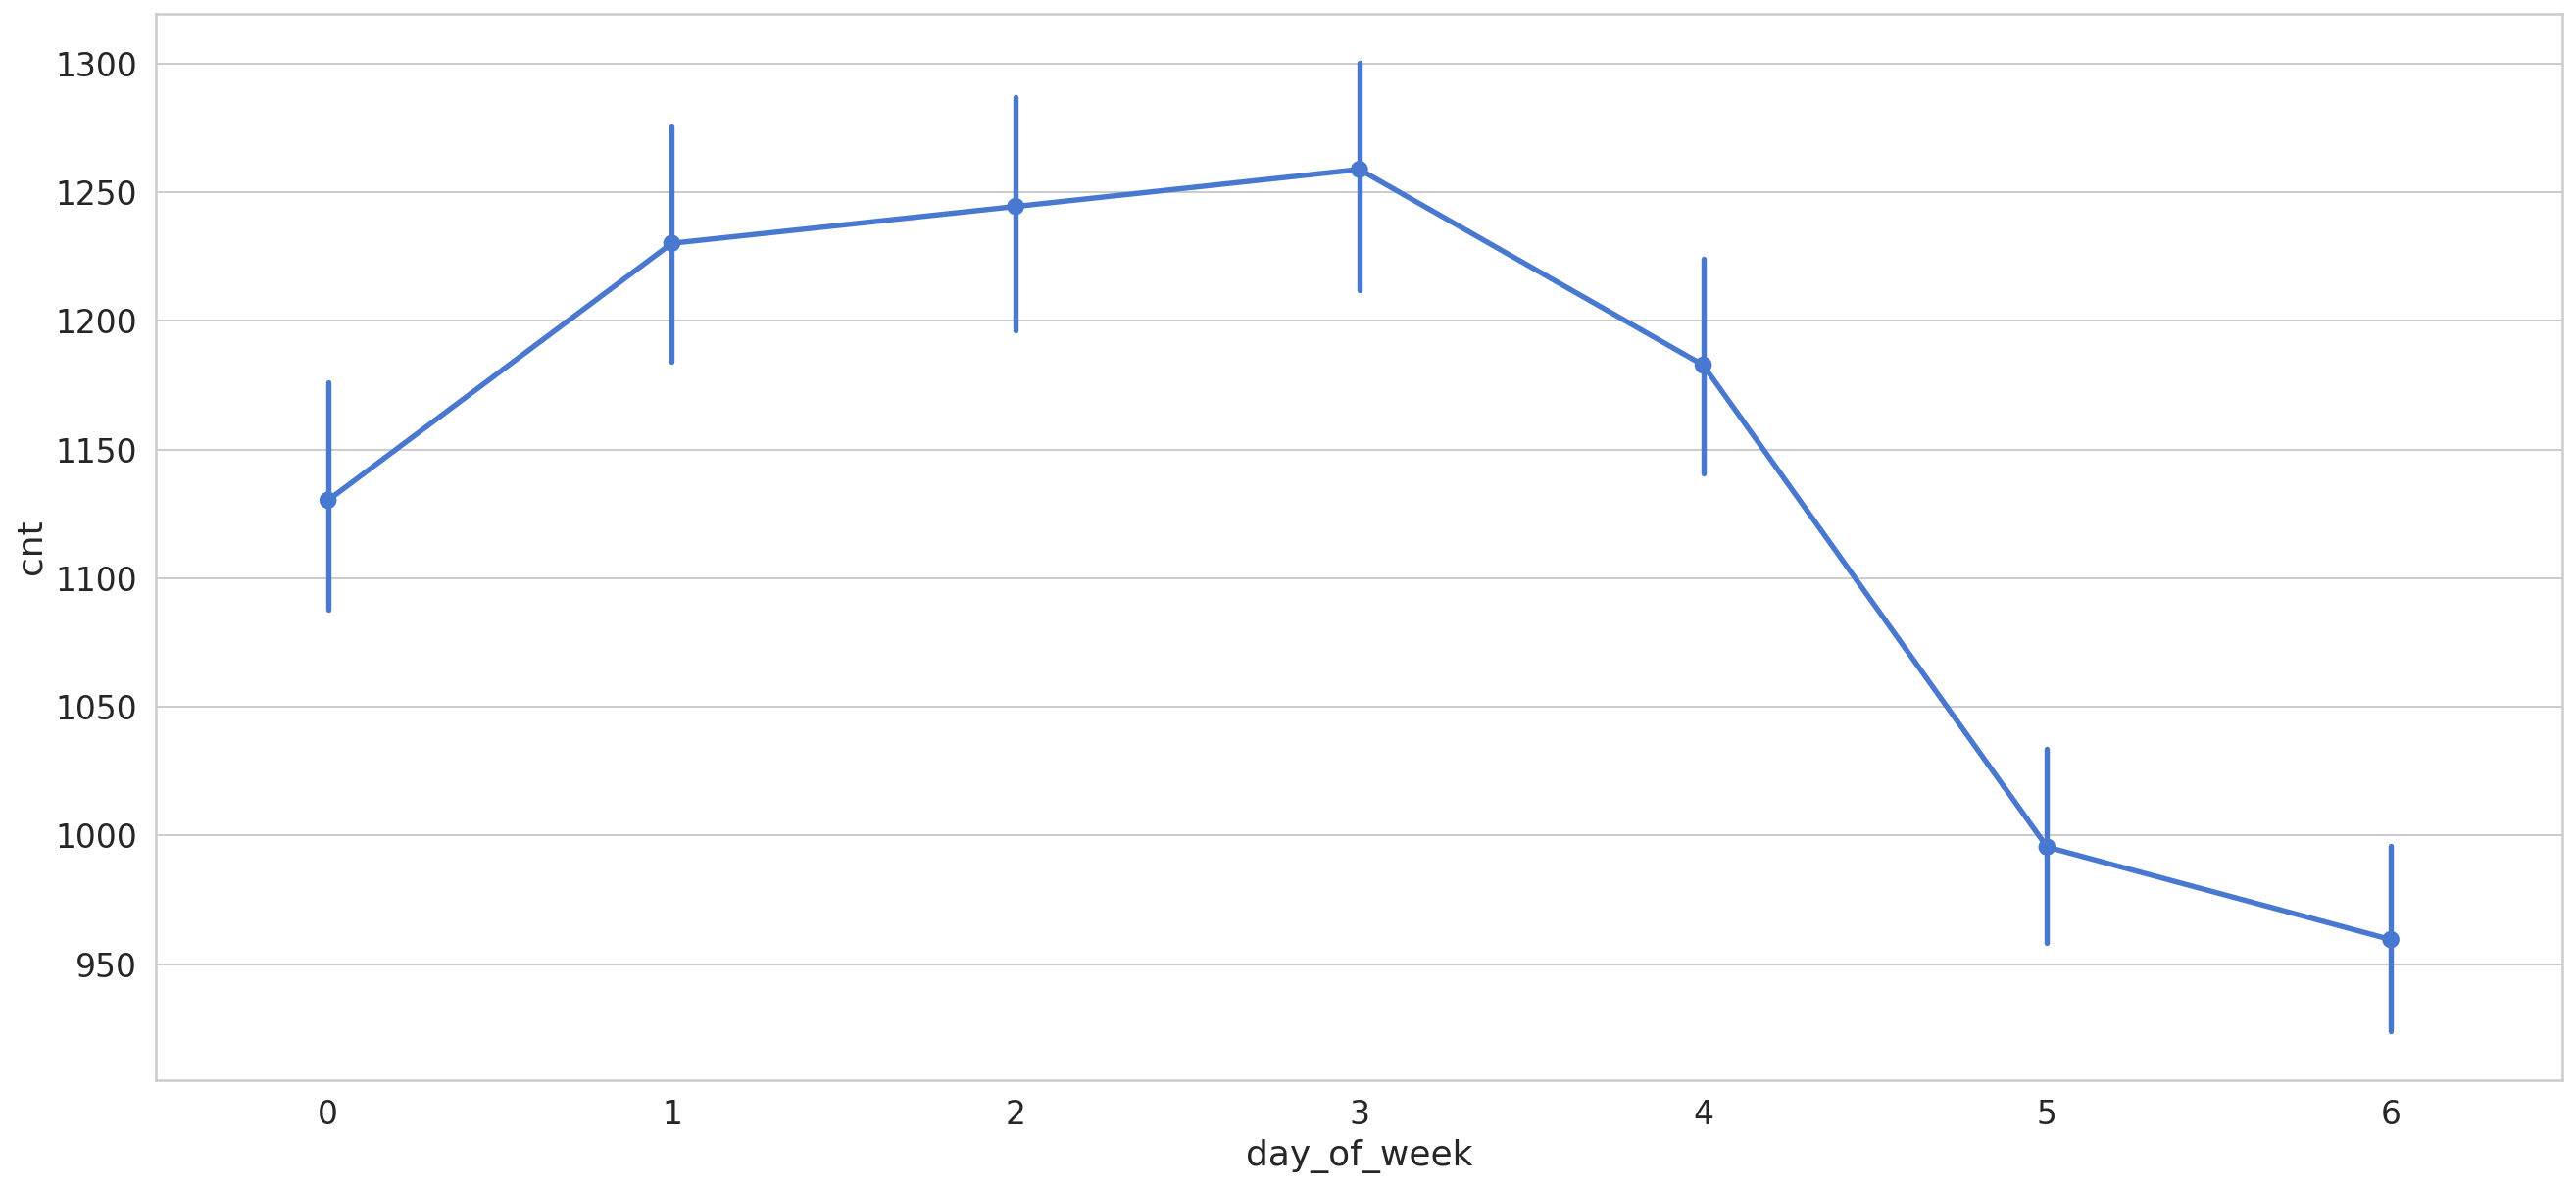

In [52]:
sns.pointplot(data=df, x='day_of_week', y='cnt')


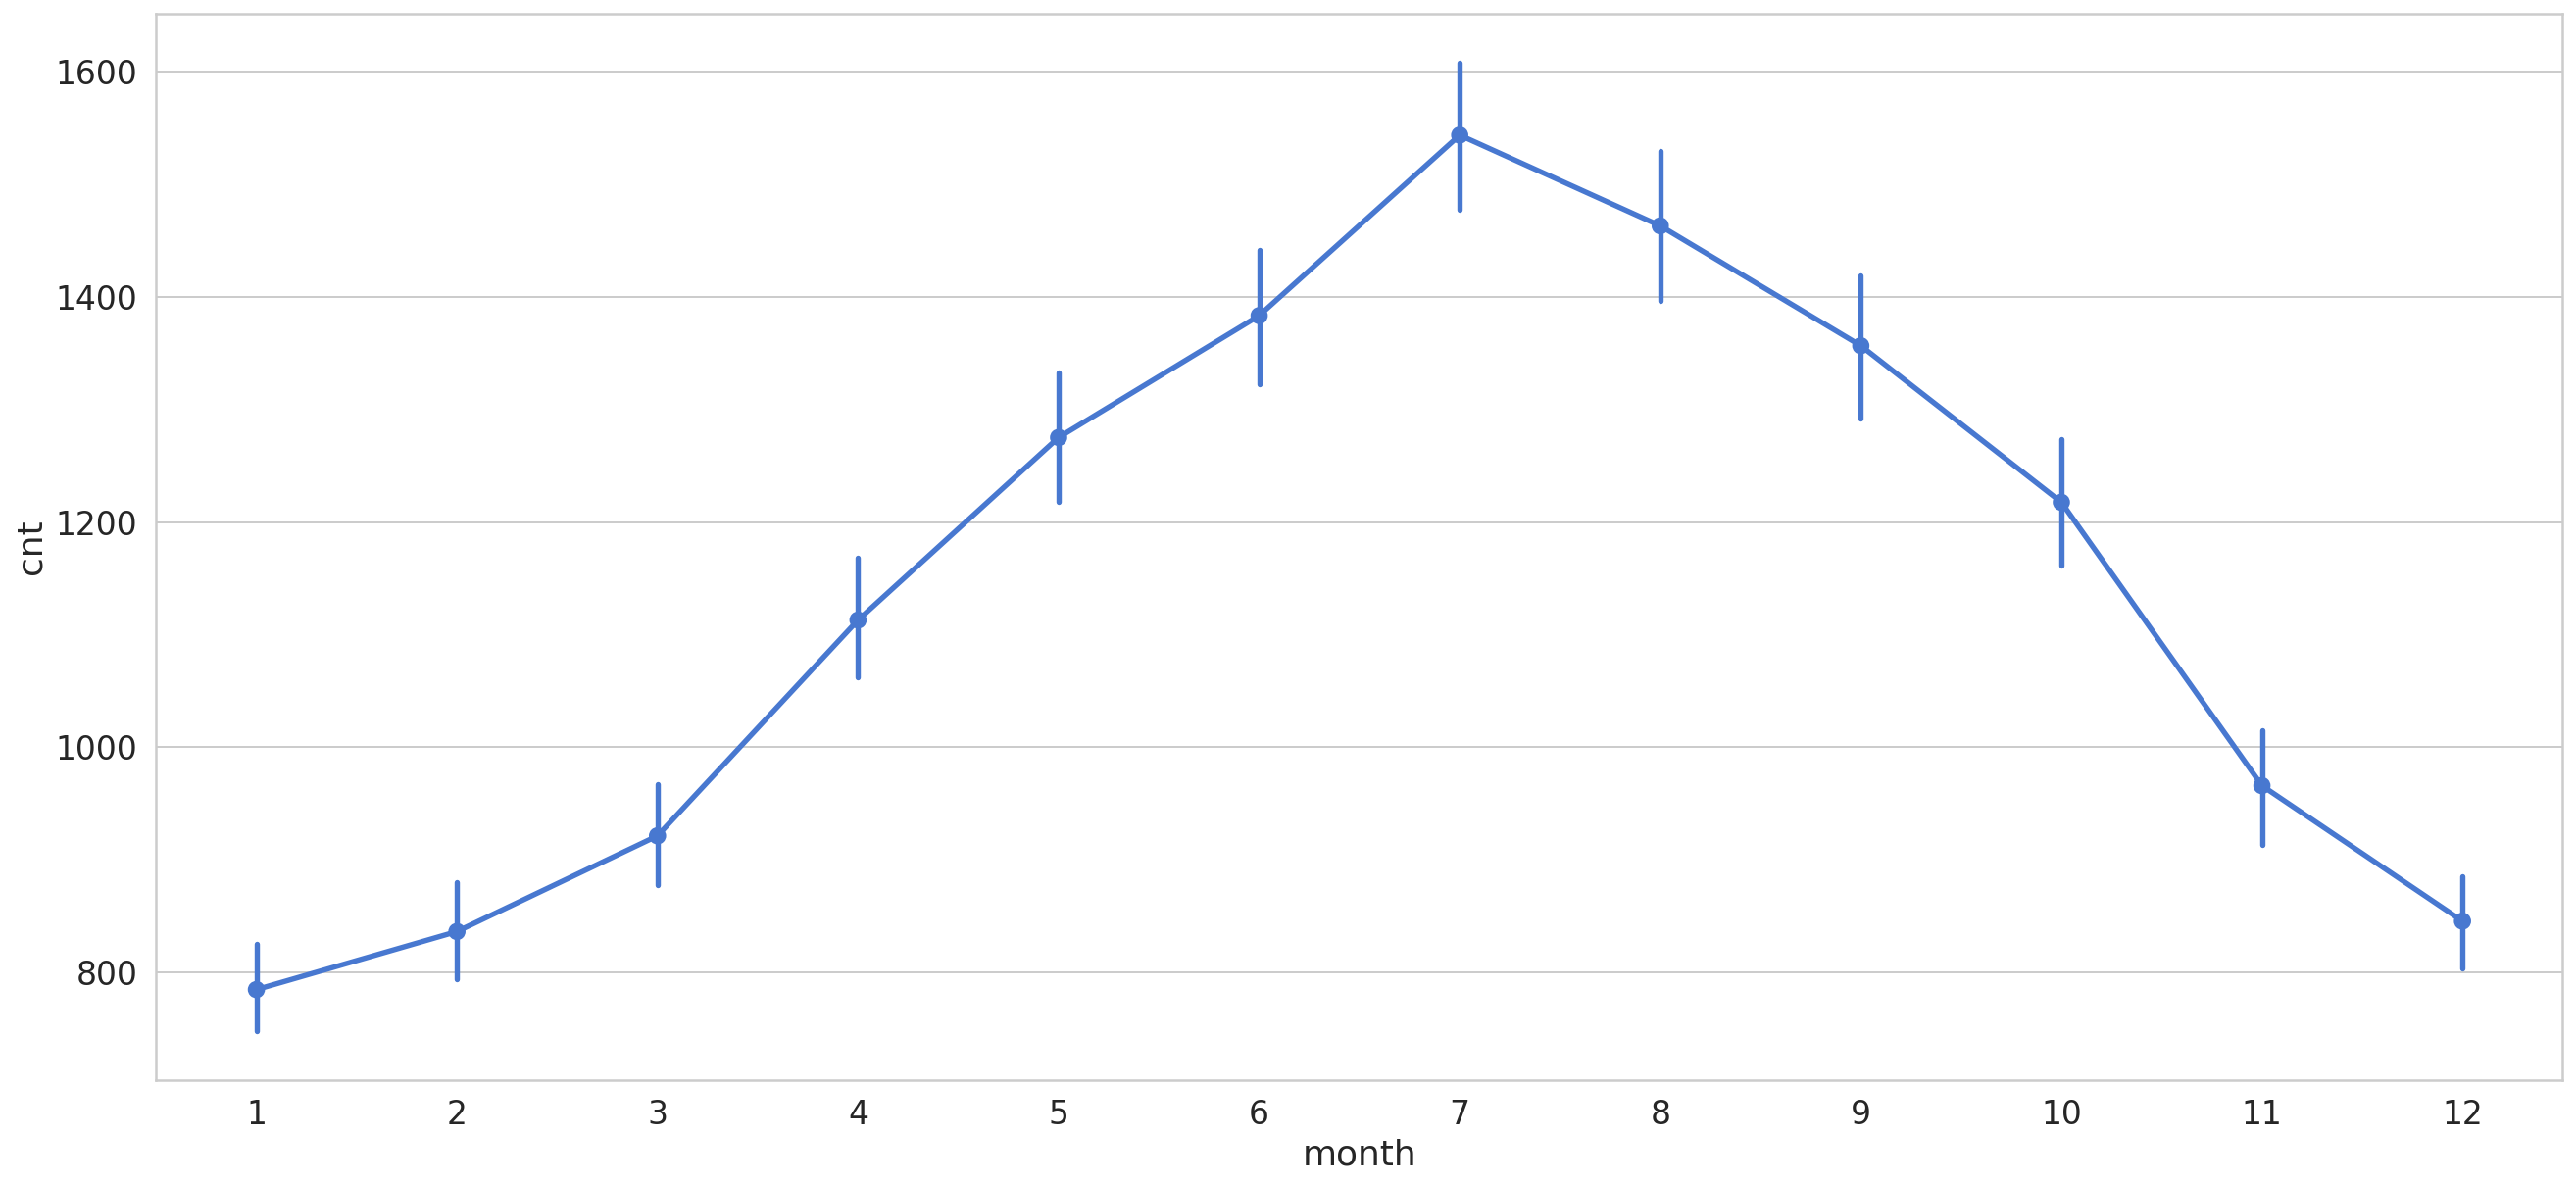

In [53]:
sns.pointplot(data=df, x='month', y='cnt')

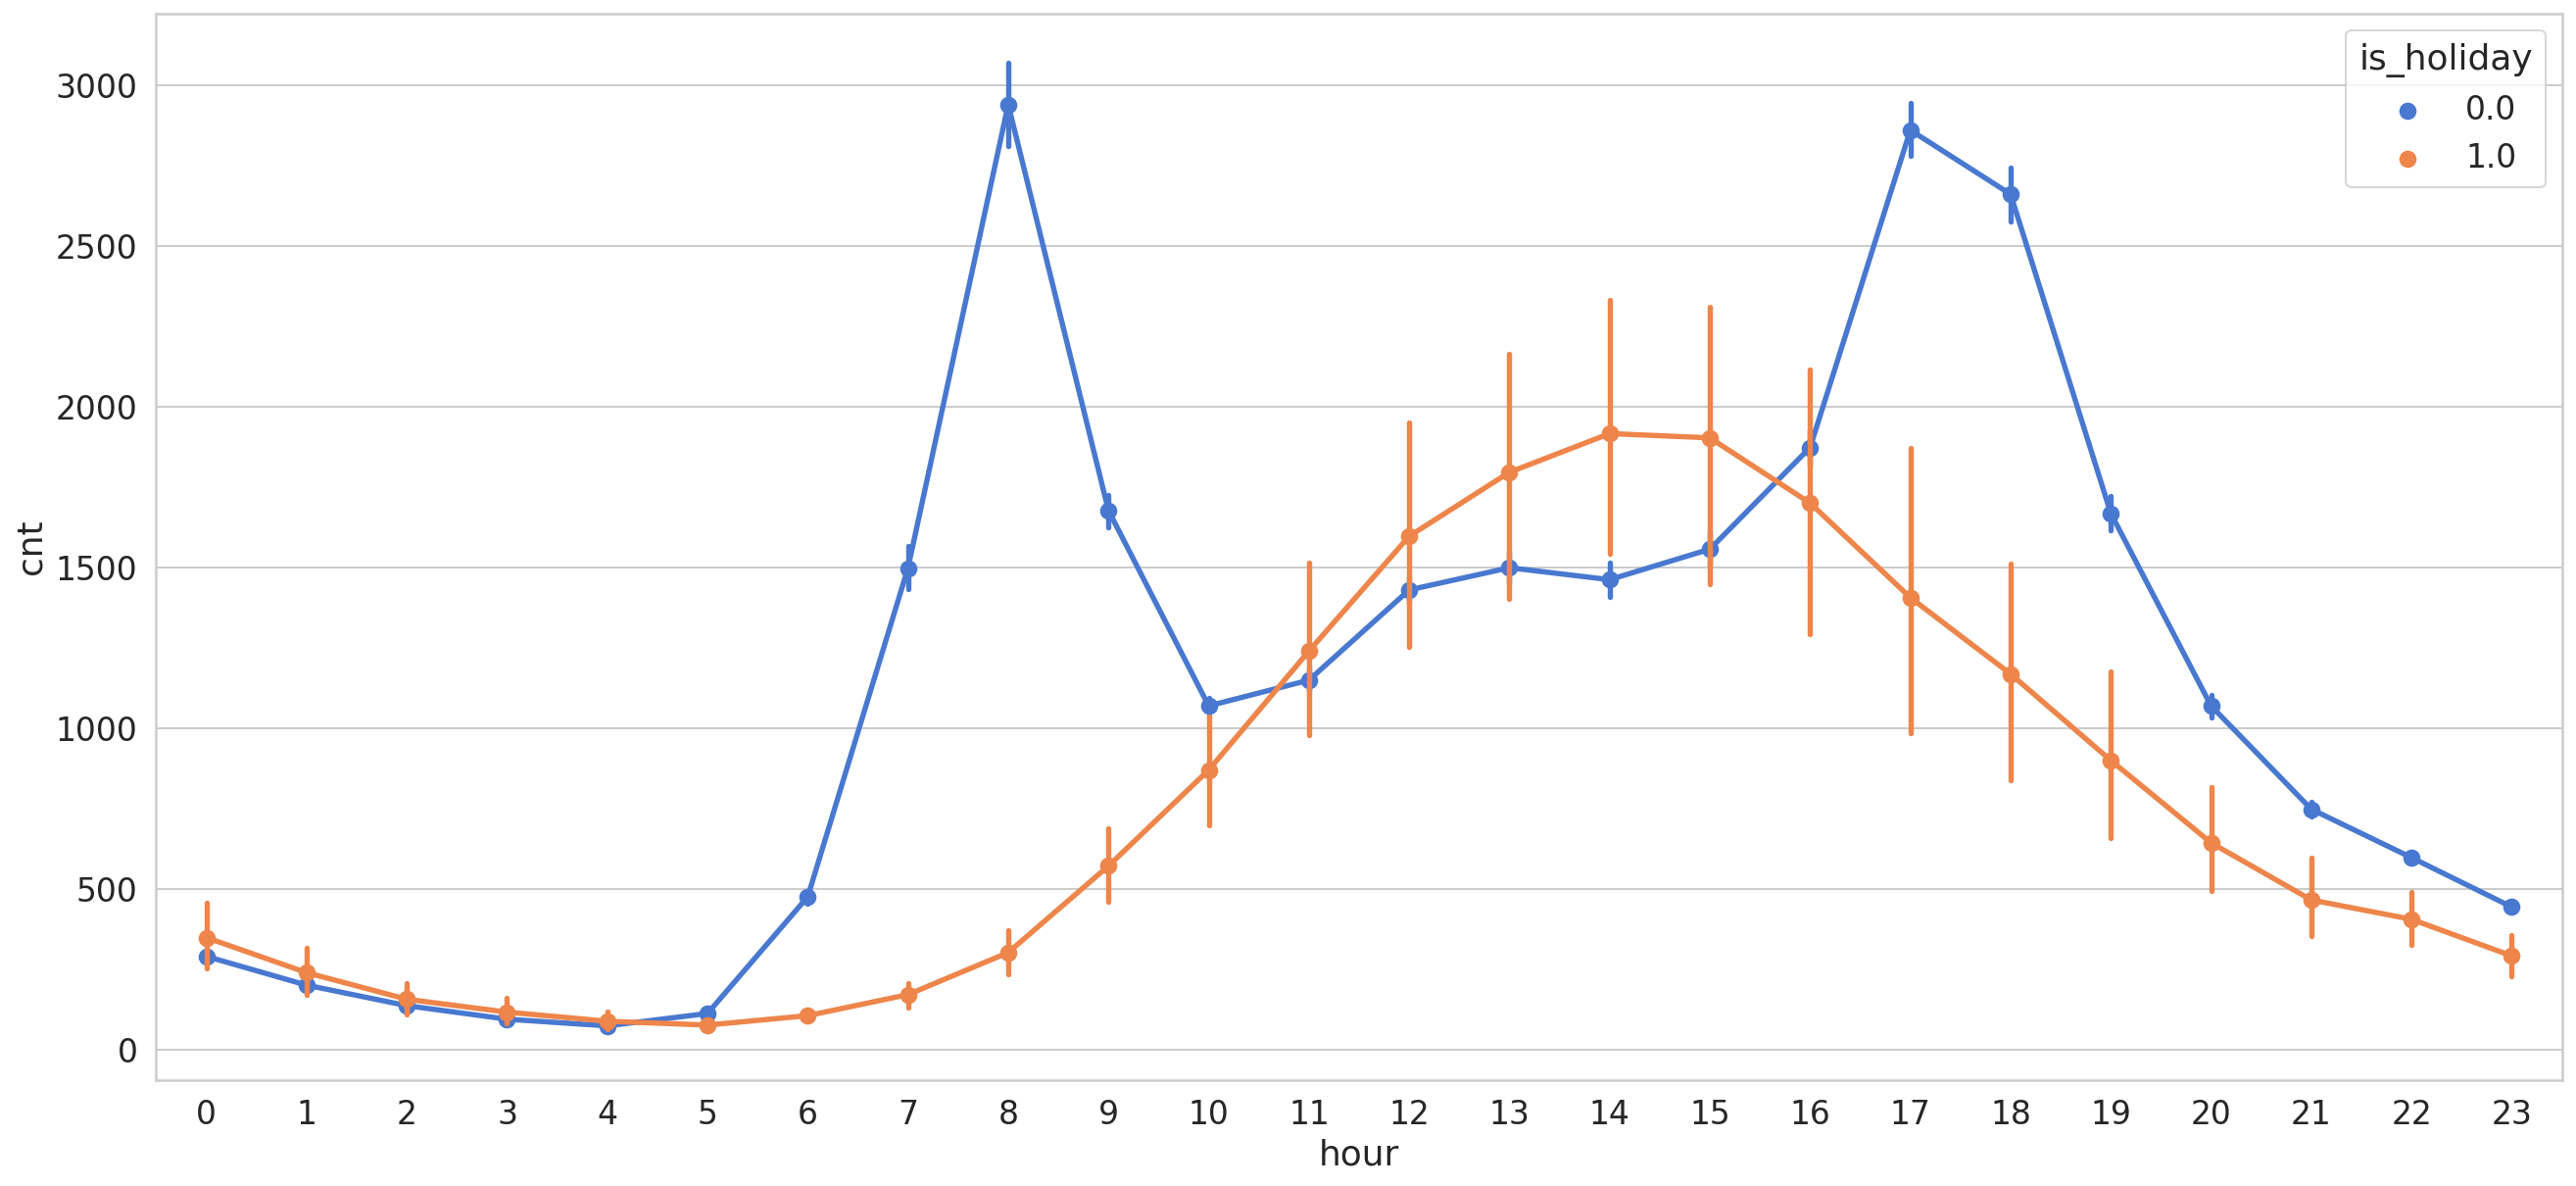

In [55]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday');

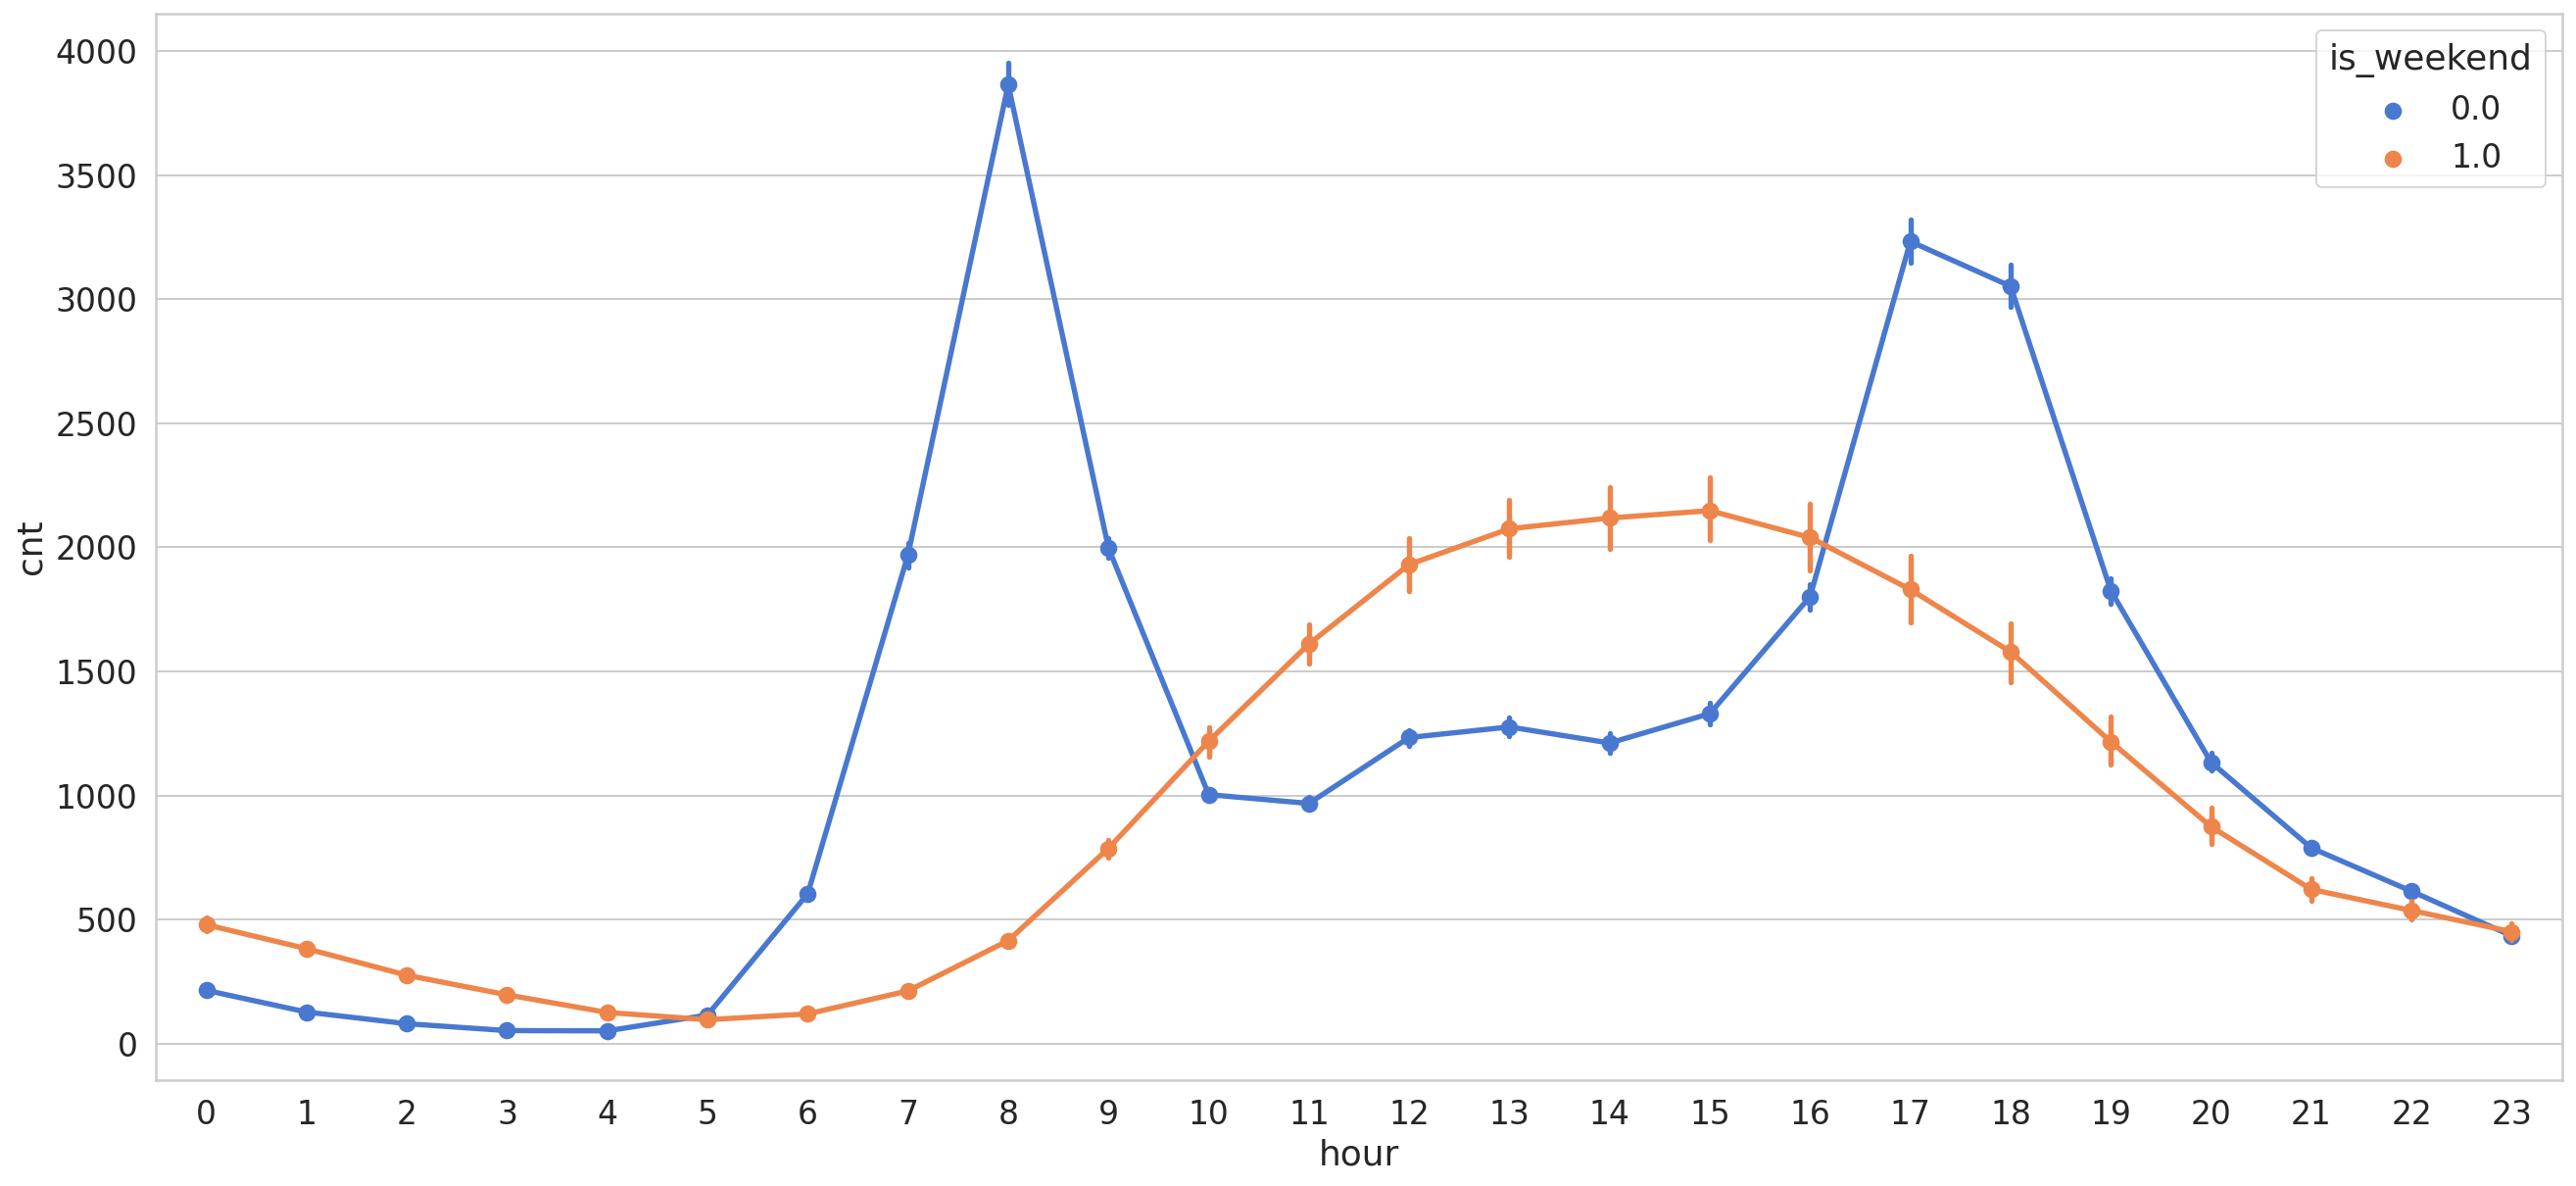

In [56]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend');

In [57]:
#split the data
train_size = int(len(df)*0.9)
test_size= len(df)-train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(15672, 13) (1742, 13)


In [63]:
#preprocess data: feature scaling

from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler() 

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']].to_numpy())

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [65]:
# LSTM use sequences for training, so we cut time series data

def create_dataset(X, y, time_steps=1):
  Xs, ys = [], []
  for i in range(len(X)-time_steps):
    v= X.iloc[i: (i+ time_steps)].to_numpy()
    Xs.append(v) 
    ys.append(y.iloc[i+time_steps])
  return np.array(Xs), np.array(ys)

In [70]:
TIME_STEPS = 24

# create actual training and test datasets
X_train, y_train = create_dataset(train, train.cnt, time_steps=TIME_STEPS)
X_test, y_test = create_dataset(test, test.cnt, time_steps=TIME_STEPS)

In [71]:
#[samples, time_shape, n_features]

print(X_train.shape, y_train.shape)

(15648, 24, 13) (15648,)


In [72]:
print(X_test.shape, y_test.shape)

(1718, 24, 13) (1718,)


In [75]:
X_train[0][0].shape

(13,)

In [78]:
# build LSTM model using Keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128,
            input_shape=(X_train.shape[1], X_train[2])
        )
    )
)
model.add(keras.layers.Dropout(rate=0.2)) #add dropout layes
model.add(keras.layers.Dense(units=1))

In [79]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [80]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
441/441 [==============================] - 18s 40ms/step - loss: 0.3233 - val_loss: 0.1592
Epoch 2/30
441/441 [==============================] - 17s 38ms/step - loss: 0.1123 - val_loss: 0.0683
Epoch 3/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0658 - val_loss: 0.0489
Epoch 4/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0456 - val_loss: 0.0423
Epoch 5/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0388 - val_loss: 0.0340
Epoch 6/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0332 - val_loss: 0.0385
Epoch 7/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0290 - val_loss: 0.0430
Epoch 8/30
441/441 [==============================] - 16s 37ms/step - loss: 0.0282 - val_loss: 0.0310
Epoch 9/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0256 - val_loss: 0.0419
Epoch 10/30
441/441 [==============================] - 17s 38ms/step - loss: 0.024

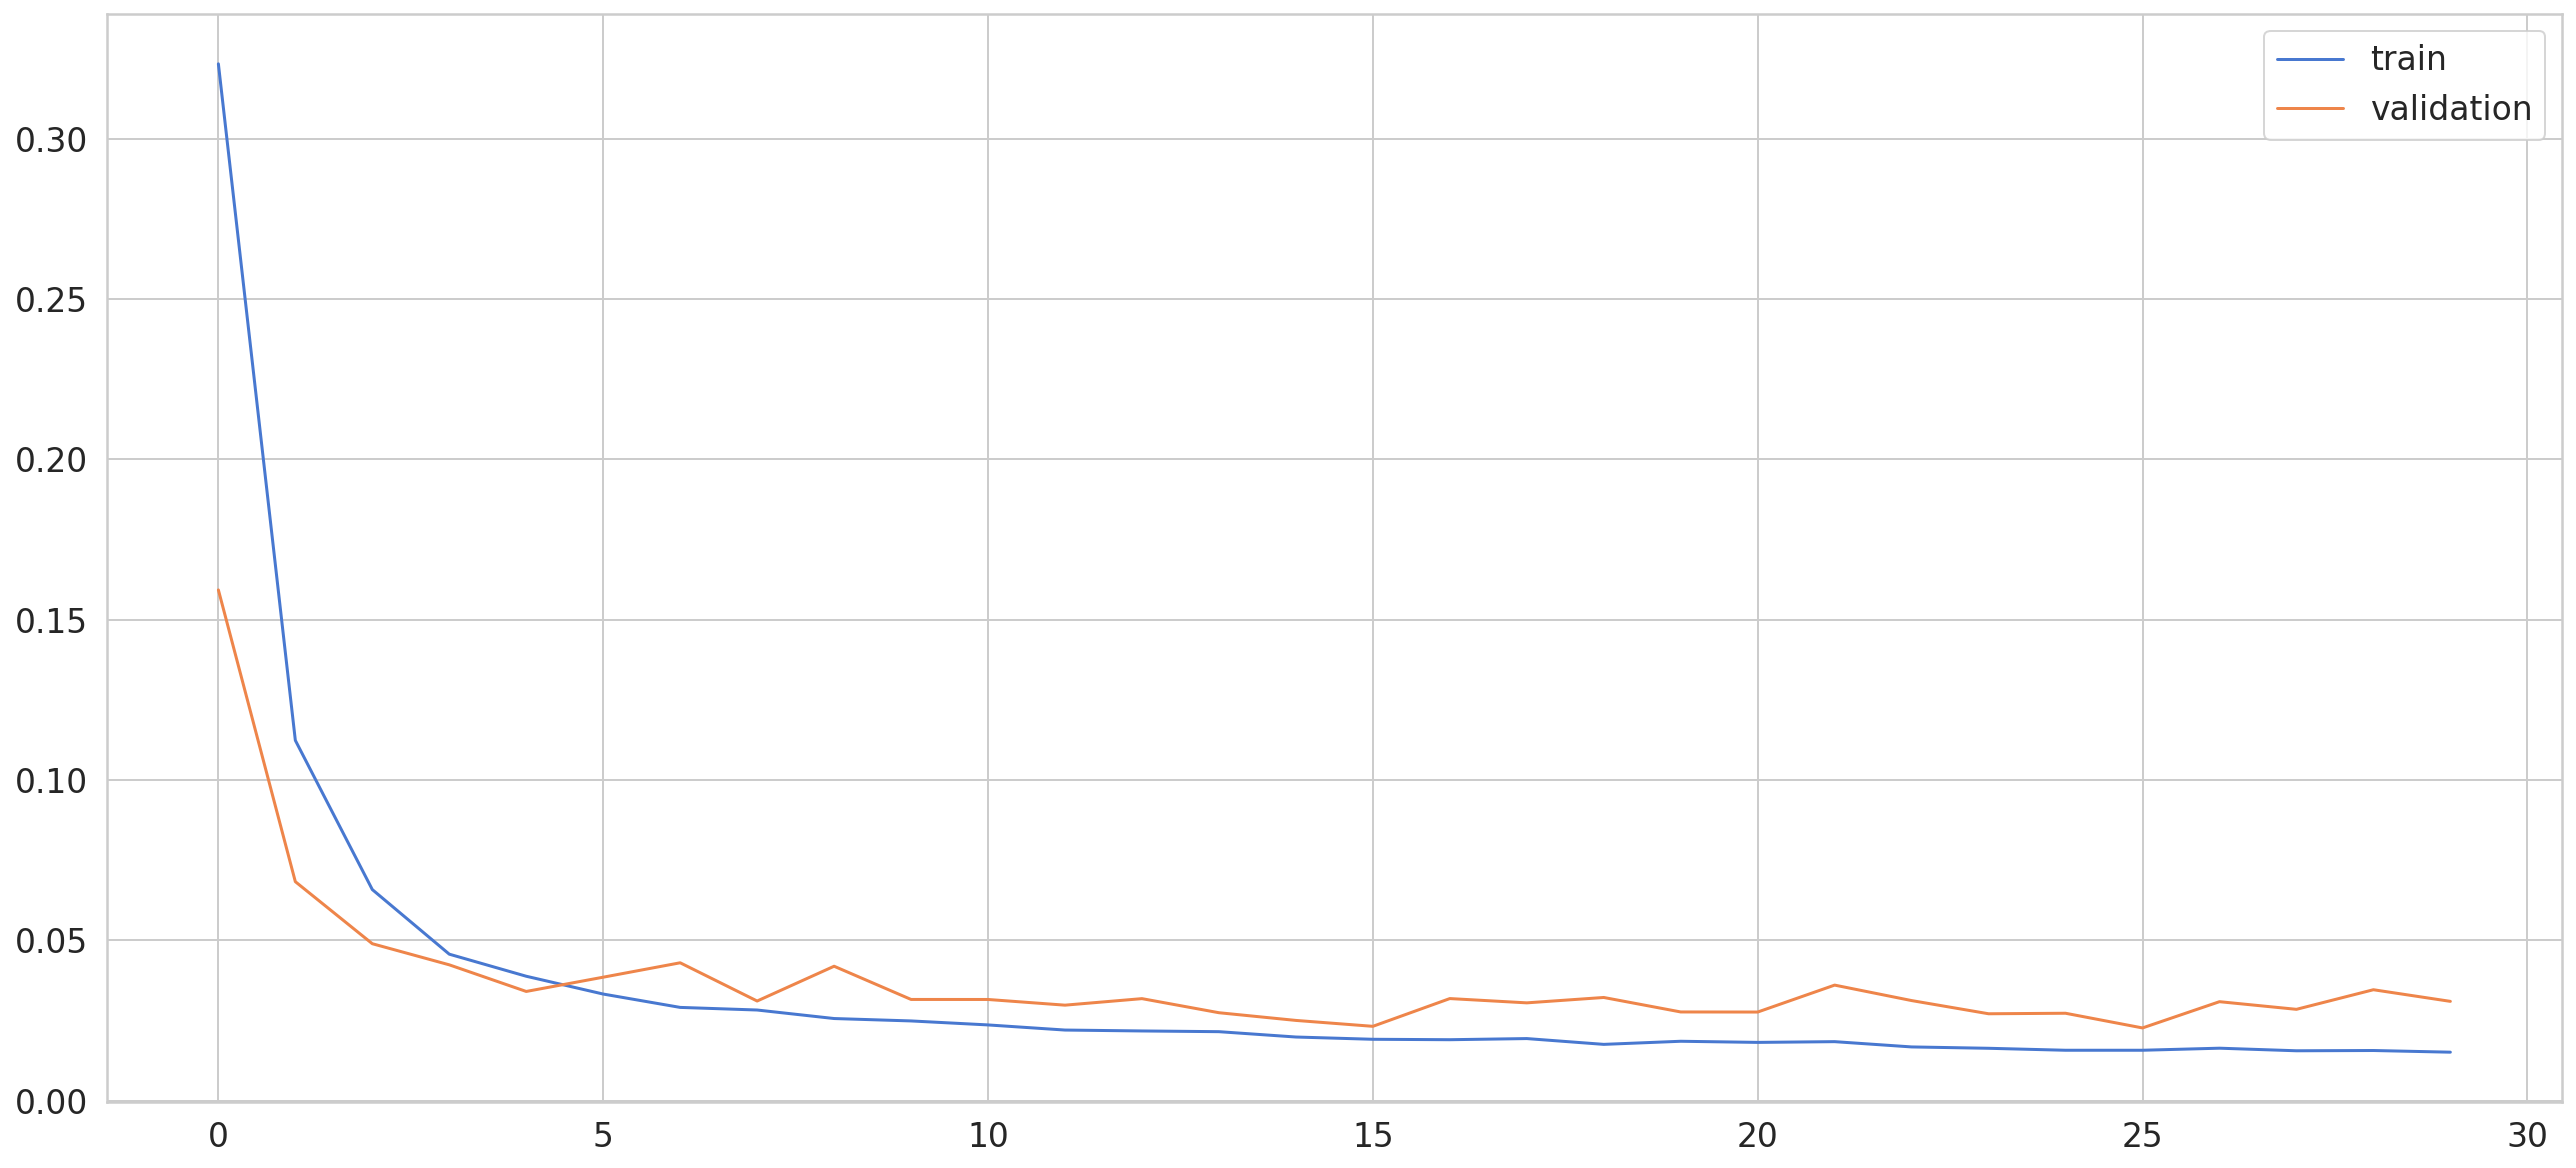

In [82]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [83]:
y_pred = model.predict(X_test)

In [99]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

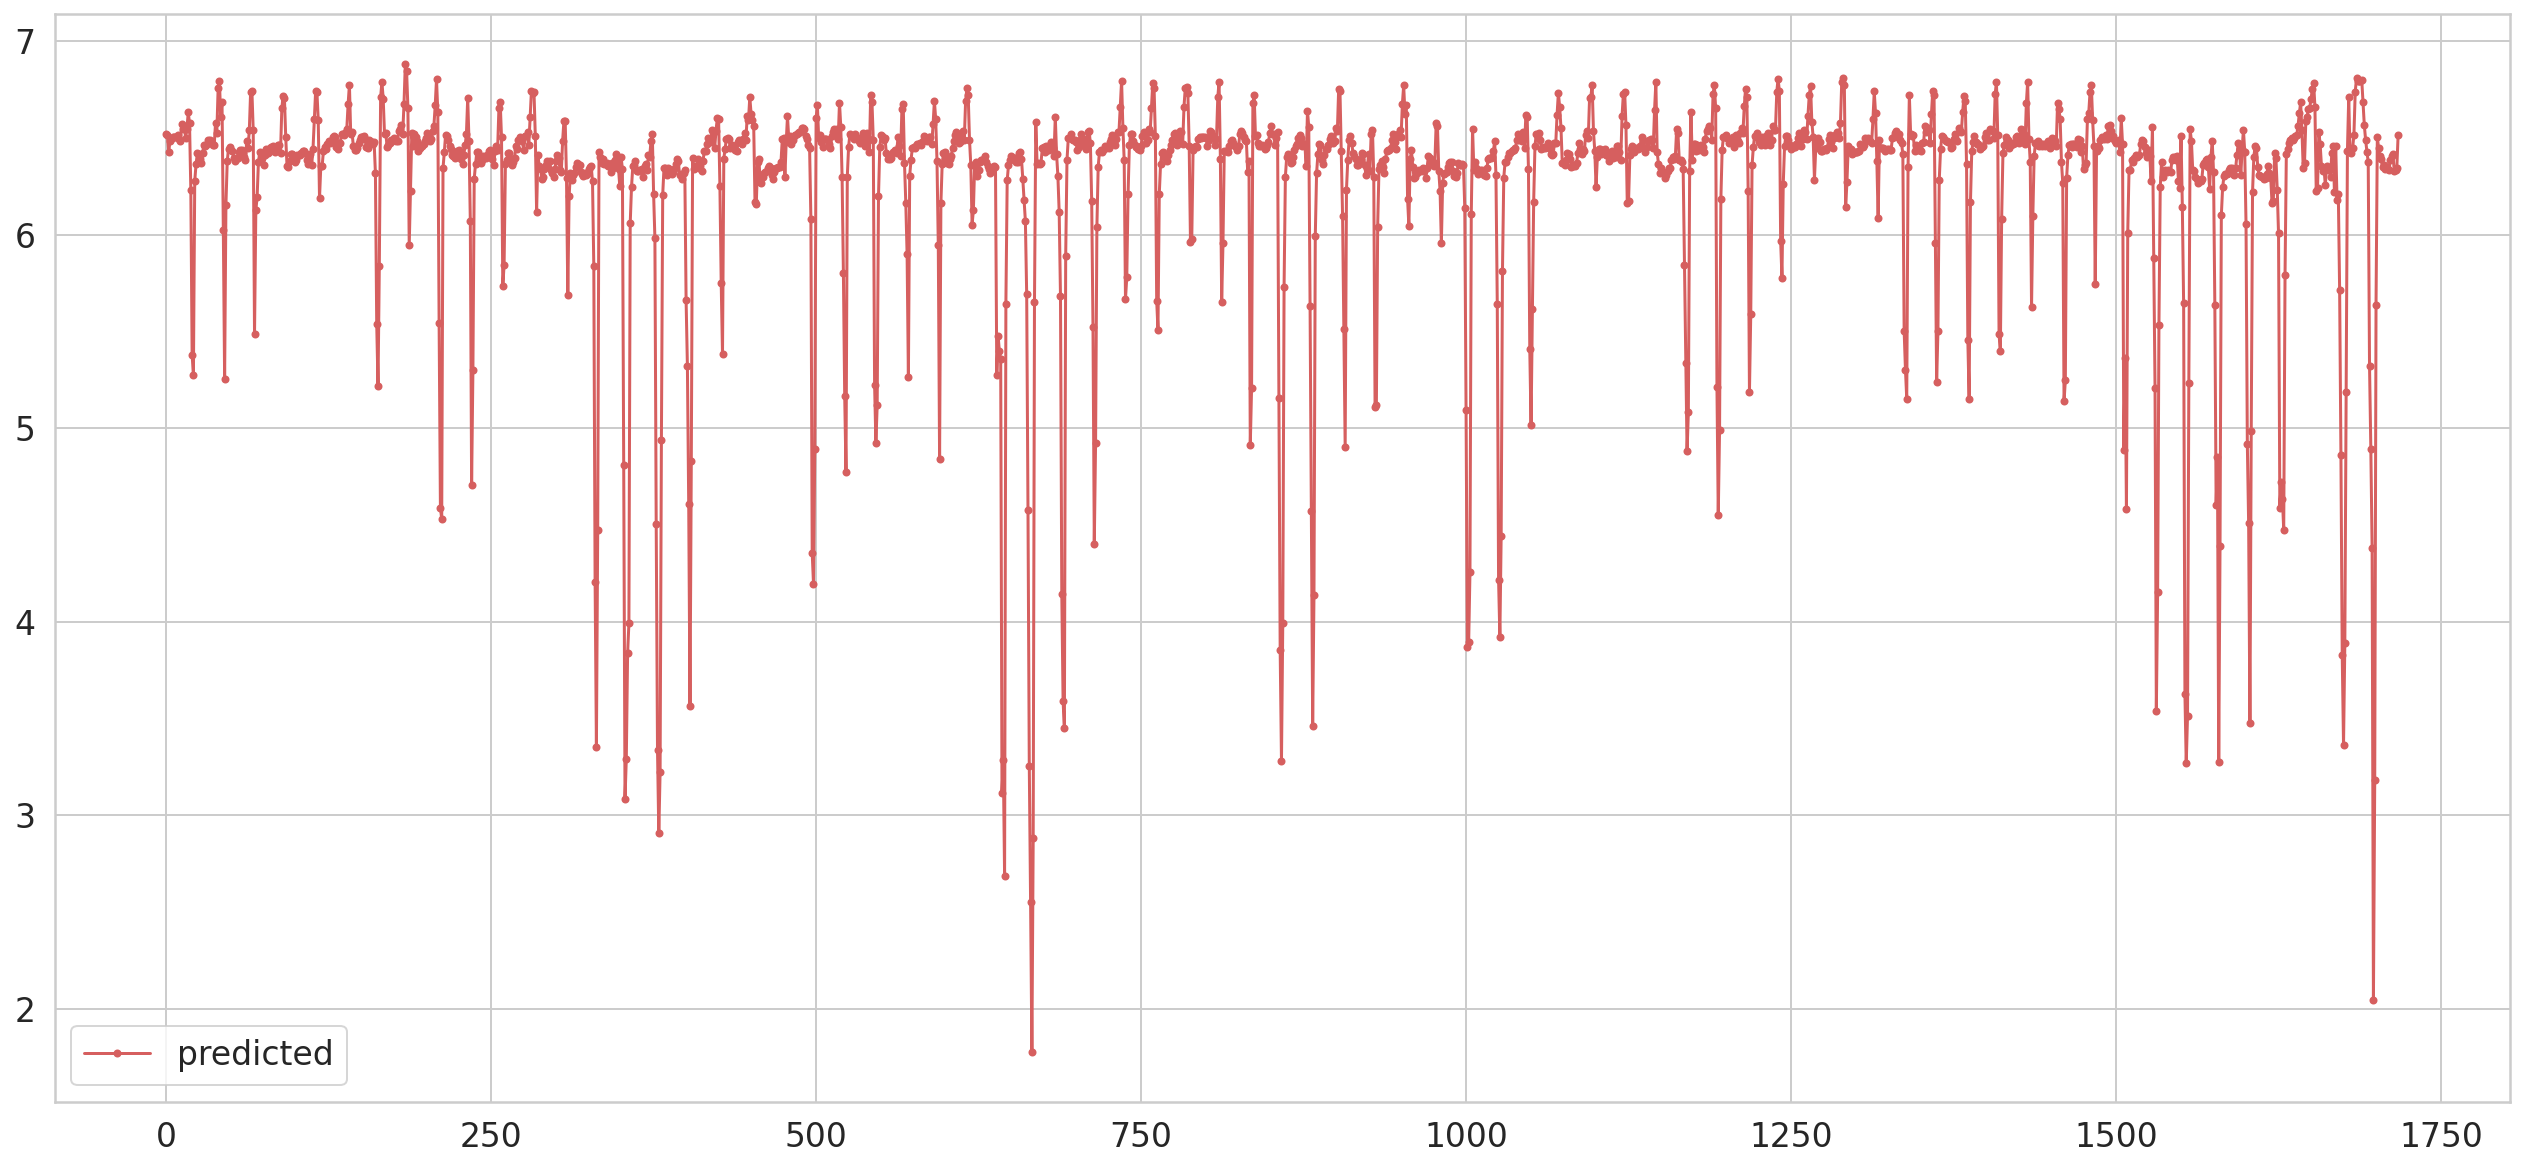

In [100]:
#plt.plot(y_test_inv.flatten(), marker='.', label='true' )
plt.plot(y_pred_inv.flatten() ,'r', marker='.' , label='predicted' )
plt.legend();

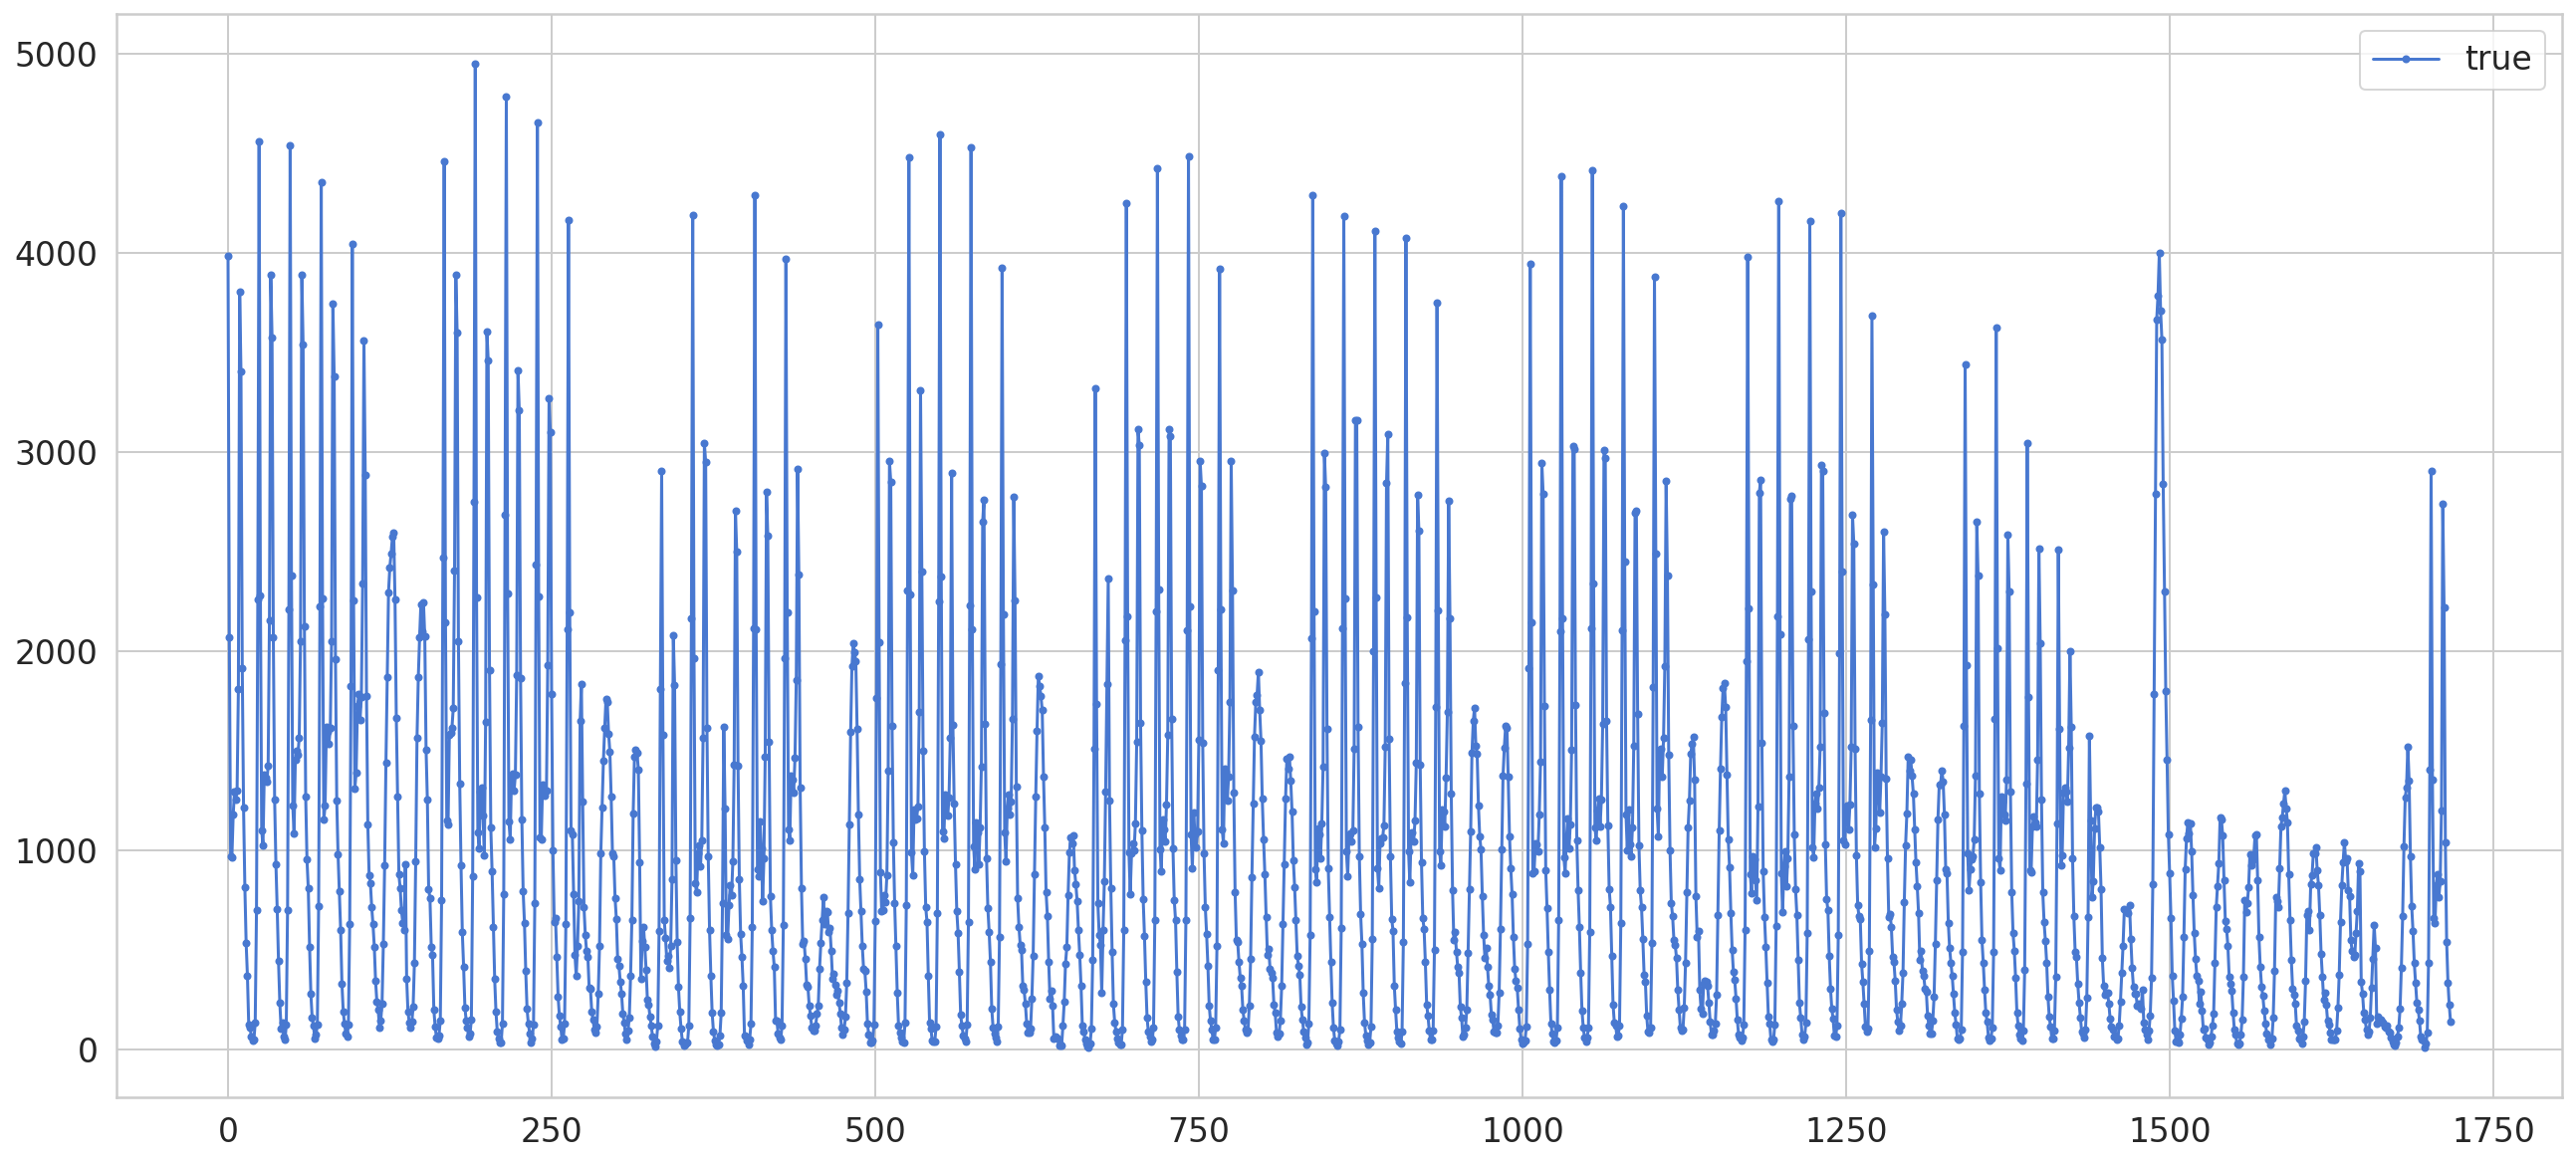

In [101]:
plt.plot(y_test_inv.flatten(), marker='.', label='true' )
#plt.plot(y_pred_inv.flatten() ,'r', marker='.' , label='predicted' )
plt.legend();